scatter plots: shows correlation between different variables

In [8]:
#lets craete a fake dataframe
#data={
   # 'job_skills':['python','sql','java','c++','c#','js','html','css','php','ruby'],
   # 'skill_count':[30,25,20,15,10,5,4,3,2,1],
   # 'skill_pay':[100,90,80,70,60,50,40,30,20,10]
#}
#transform this dictionary into a df
#df=pd.DataFrame(data)
#df.plot(kind='scatter',x='skill_count',y='skill_pay')

In [9]:
#we need to create a df in which there are 3 col 
#job_skills median_salary and skill_count

In [10]:
#import neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#load the dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\saxen\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#create a new df which shows jobs of data analyst
df=df[df['job_title_short']=='Data Analyst']

In [12]:
#now create a new df in which we explode out the skill col
df_exploded=df.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,azure,"{'cloud': ['aws', 'azure']}"
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sas,"{'analyst_tools': ['sas', 'excel'], 'programmi..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,sql,"{'analyst_tools': ['sas', 'excel'], 'programmi..."


In [13]:
#now we need to do grouping of job skills and salary_year_avg
#need to find the median from the salary_year_avg col

#this gives the counts of each job skills
#df_exploded.groupby('job_skills').size()
#but with the count of these skills we also need the associated median salary

skill_stats=df_exploded.groupby('job_skills').agg(
    #we created a new col skill_count in which we get the count of each skill
    #count and median are the agg func tht we applied on the col
    skill_count=('job_skills','count'),
    #we created a new col median_salary in which we get median of salary_year_avg
    median_salary=('salary_year_avg','median')
)
#sort acc to the skill_count col and in descending order and get only the top 10 values
skill_stats=skill_stats.sort_values(by='skill_count',ascending=False).head(10)

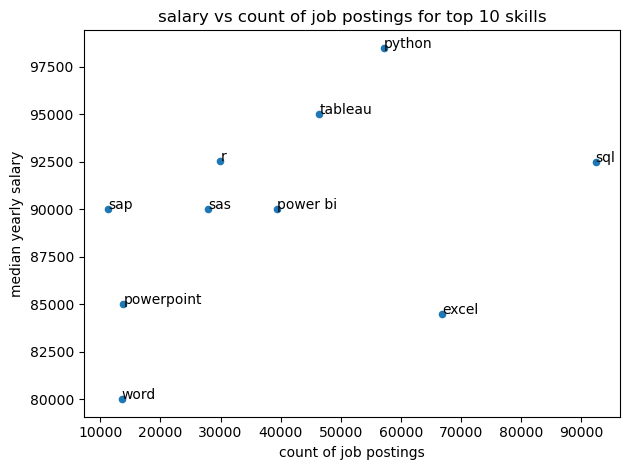

In [14]:
skill_stats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('count of job postings')
plt.ylabel('median yearly salary')
plt.title('salary vs count of job postings for top 10 skills')
plt.tight_layout()

#but we are not anle to guess what each dot represents
#loop through the col

#This code adds text labels to a scatter plot - it writes the name of each skill next to its corresponding data point on the graph.
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)
plt.show()

In [15]:
''' 
Imagine you already have a scatter plot where:

Each dot represents a skill

The dot's position shows:

X-position = how many jobs need that skill (skill_count)

Y-position = the typical salary for that skill (median_salary)

But right now, the dots are just dots - you don't know which dot is which skill!

The Solution: Adding Labels
python
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
Let's break it down:

1. The Loop

python
for i, txt in enumerate(skill_stats.index):
This goes through each skill in your top 10 list one by one

i = the position number (0, 1, 2, 3...)

txt = the skill name itself ("Python", "SQL", "Excel", etc.)

2. Placing the Text

python
plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
For each skill, this does:

First number: The X-coordinate (how far right to place the text)

skill_stats['skill_count'].iloc[i] = the job count for that skill

Second number: The Y-coordinate (how high to place the text)

skill_stats['median_salary'].iloc[i] = the salary for that skill

Third item: The actual text to display

txt = the skill name
'''

' \nImagine you already have a scatter plot where:\n\nEach dot represents a skill\n\nThe dot\'s position shows:\n\nX-position = how many jobs need that skill (skill_count)\n\nY-position = the typical salary for that skill (median_salary)\n\nBut right now, the dots are just dots - you don\'t know which dot is which skill!\n\nThe Solution: Adding Labels\npython\nfor i, txt in enumerate(skill_stats.index):\n    plt.text(skill_stats[\'skill_count\'].iloc[i], skill_stats[\'median_salary\'].iloc[i], txt)\nLet\'s break it down:\n\n1. The Loop\n\npython\nfor i, txt in enumerate(skill_stats.index):\nThis goes through each skill in your top 10 list one by one\n\ni = the position number (0, 1, 2, 3...)\n\ntxt = the skill name itself ("Python", "SQL", "Excel", etc.)\n\n2. Placing the Text\n\npython\nplt.text(skill_stats[\'skill_count\'].iloc[i], skill_stats[\'median_salary\'].iloc[i], txt)\nFor each skill, this does:\n\nFirst number: The X-coordinate (how far right to place the text)\n\nskill_stat